*** TP : Gestion et Analyse des Résultats Scolaires des Étudiants avec Pandas et Excel: ***

Objectif
 • Manipuler des données issues d’un fichier Excel, effectuer des analyses statistiques et générer des visualisations 
à l’aide de Pandas et Matplotlib.
 Contexte du TP
 • L’université souhaite automatiser l’analyse des résultats scolaires des étudiants. On doit traiter un fichier Excel 
contenant les notes des étudiants et fournir des statistiques détaillées sur leurs performances.
 • Données disponibles dans resultats.xlsx (Feuille Notes) :
 Problèmes à gérer :
 • Les Valeurs manquantes (N/A, "?", "Not Available") pour les notes.
 • Les âges incorrects ou manquants.
 • L’analyse des performances des étudiants par matière et par statut.
 • La visualisation graphique des résultats

Moyenne des notes par matière :
Matière
Informatique      0.000
Mathématiques     7.375
Physique         13.875
Name: Note, dtype: float64

Étudiant avec la meilleure note :
      Nom Prénom  Note
2  Durand  Clara  17.0

Nombre d'étudiants absents : 2

Répartition des notes :
count    12.000000
mean      7.083333
std       7.612291
min       0.000000
25%       0.000000
50%       4.750000
75%      14.625000
max      17.000000
Name: Note, dtype: float64


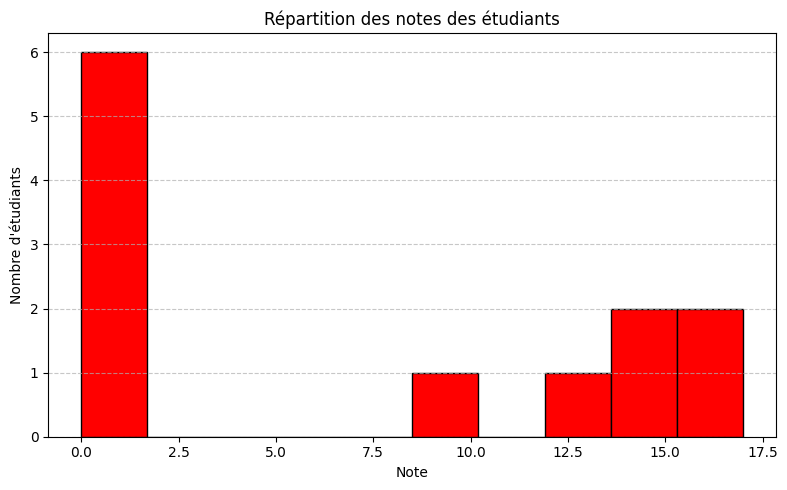

In [12]:

import pandas as pd
import subprocess
import sys

import matplotlib.pyplot as plt

# ***Partie 1 : Chargement et affichage des données ***

# Charger le fichier Excel
df = pd.read_excel("file.xlsx", sheet_name="Notes")

# Afficher les 5 premières lignes
# print(df.head())

# Sélectionner uniquement les colonnes utiles
colonnes_utiles = ["ID_Étudiant", "Nom", "Prénom", "Âge", "Matière", "Note", "Statut"]
df = df[colonnes_utiles]

# Vérification
# print(df.head())

# ***Partie 2:  Nettoyage des données ***

# Ce code fait deux choses :
# Il convertit toutes les notes en valeurs numériques et transforme les valeurs invalides (comme "?" ou "Not Available") en NaN.

# Il remplace ensuite les NaN par 0.0, ce qui correspond aux étudiants absents.
# 🧩 Étape 1 : Remplacer les valeurs manquantes ou invalides dans la colonne Note

# S'assurer que les valeurs de "Note" sont bien numériques (si ce n'est pas déjà fait)
df["Note"] = pd.to_numeric(df["Note"], errors="coerce")
# Remplacer les NaN dans la colonne "Note" par 0.0
df["Note"] = df["Note"].fillna(0.0)
# print(df)

# 🧩 Étape 2 : Nettoyer la colonne Âge
# Remplacer les valeurs non numériques par NaN
df["Âge"] = pd.to_numeric(df["Âge"], errors="coerce")
# Remplacer les NaN par la médiane des âges valides
mediane_age = df["Âge"].median()
df["Âge"] = df["Âge"].fillna(mediane_age)

# 🧩 Étape 3 : S’assurer que la colonne Note est bien en float
df["Note"] = df["Note"].astype(float)

#  • Partie 3 : Analyse statistique des notes

# 1. Moyenne des notes par matière
moyennes_par_matiere = df.groupby('Matière')['Note'].mean()
print("Moyenne des notes par matière :")
print(moyennes_par_matiere)

# 2. Étudiant avec la meilleure note
meilleure_note = df['Note'].max()
etudiant_meilleur = df[df['Note'] == meilleure_note][['Nom', 'Prénom', 'Note']]
print("\nÉtudiant avec la meilleure note :")
print(etudiant_meilleur)

# 3. Nombre d'étudiants absents
nb_absents = (df['Statut'] == 'Absent').sum()
print(f"\nNombre d'étudiants absents : {nb_absents}")

# 4. Analyse de la répartition des notes
print("\nRépartition des notes :")
print(df['Note'].describe())



  # Histogramme des notes
plt.figure(figsize=(8, 5))
plt.hist(df['Note'].dropna(), bins=10, color='red', edgecolor='black')
plt.title("Répartition des notes des étudiants")
plt.xlabel("Note")
plt.ylabel("Nombre d'étudiants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>